In [1]:
##### C:\Users\David\Dropbox\IDIBAPS\my code\Project 1 (master thesis)\Modeling radial dimension\matrixes radial model simulations\model_2_0\model_radial_dimension_2.m

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, exp, sqrt, pi
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import scipy
from scipy import special
import seaborn as sns

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

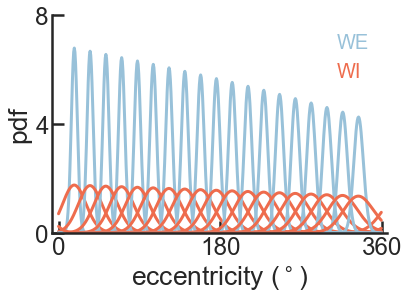

In [26]:
N=512

v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 
###
kappas_e_range= np.linspace(100, 300, N) ##100-300 ok
kappas_e_range = np.flip(kappas_e_range)
###
kappas_i_range = np.linspace(11, 20, N) #15-20 ok
kappas_i_range = np.flip(kappas_i_range)
###
for i in range(0, N):
    v_E_new=[e**(kappas_e_range[i]*cos(theta[f]))/(2*pi*scipy.special.i0(kappas_e_range[i])) for f in range(0, len(theta))]    
    v_I_new=[e**(kappas_i_range[i]*cos(theta[f]))/(2*pi*scipy.special.i0(kappas_i_range[i])) for f in range(0, len(theta))]
    ###    
    vE_NEW=roll(v_E_new,i)
    vI_NEW=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW

    
####
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.ylim(0,8)
plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)

***kappaE=300 and kappaI=30 for radius 1  
kappaE=225 and kappaI=15 for radius 3.***   
1/kappa is an analogous of variance in the normal distribution, so the higher the kappa, lower the concentration (a reciprocal measure of dispersion).

In [306]:
N=512 ##number of neurons

rint = 1 
rext = 6
radii = np.linspace(rint, rext, N) ##all radii (linear)

#### sigmasE
ser1 = 1/300
ke1=1.  
ke2=1.2             
ke3=0.05             
SE = ke1*ser1 * radii**ke2 + ke3 ##all sigmas (supralinear increase)
#print(SE[0], SE[-1])

#### sigmasI
sir1 = 1/30 
ki1=0.5
ki2=1.1 ##above 1 to be supralinear
ki3=0.2
SI = ki1*sir1*radii**ki2 + ki3 ##all sigmas (supralinear increase)
#print(SI[0], SI[-1])


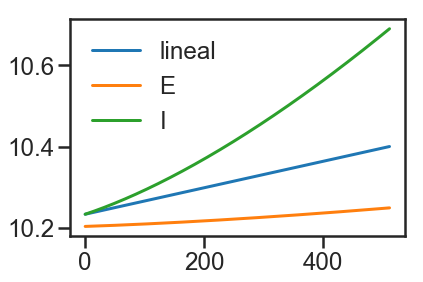

In [299]:
sir1 = 1/30 
ki1=1.5 ##above 1 to be supralinear
ki2=10.2

#SI = sir1 * radii**ki1 + ki2 
SIL = sir1* radii**1 + ki2
SIsigE= (1/300)* radii**ki1  + ki2
SIsigI = (1/30)* radii**ki1  + ki2


#plt.plot(SI, label='real')
plt.plot(SIL, label='lineal')
plt.plot(SIsigE, label='E')
plt.plot(SIsigI, label='I')



plt.legend(frameon=False)

In [308]:
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

for j in range(0, N): #para cada distancia hay una sigma diferente
    for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((radii[i]- radii[j])**2)/(2*(SE[j]**2)))
        v_I[i]= 1/(sqrt(2*pi)*SI[j])*e**(-((radii[i]- radii[j])**2)/(2*(SI[j]**2)))
    ####
    WE[:,j]=v_E;
    WI[:,j]=v_I;
###

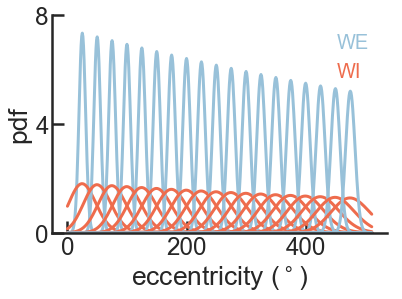

In [309]:
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.ylim(0,8)
plt.yticks([0,4,8])
#plt.xlim(-10, 520)
#plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)  

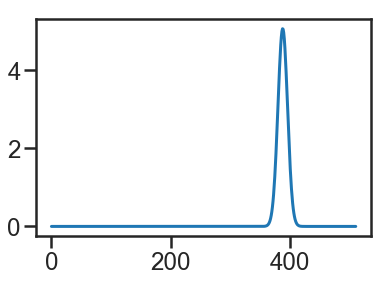

In [314]:
st = zeros((N));

for j in range(0, N): #para cada distancia hay una sigma diferente
    for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        st[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((pos_stim- radii[i])**2)/(2*(SE[j]**2)))

##
plt.plot(st)

In [394]:


from linares_plot import *
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.signal
from scipy.optimize import curve_fit 


def decode_rE(rE, a_ini=0, a_fin=360, N=512):
    #Population vector for a given rE
    # return ( angle in radians, absolut angle in radians, abs angle in degrees )
    N=len(rE)
    Angles = np.linspace(a_ini, a_fin, N) 
    angles=np.radians(Angles)
    rE = np.reshape(rE, (1,N))
    R = numpy.sum(np.dot(rE,exp(1j*angles)))/numpy.sum(rE) ## finding it with imagianry numbers
    angle_decoded = np.degrees(np.angle(R))
    if angle_decoded<0:
        angle_decoded = 360+angle_decoded
    
    return angle_decoded



def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)


 
def most_frequent(List): 
    dict = {} 
    count, itm = 0, '' 
    for item in reversed(List): 
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count : 
            count, itm = dict[item], item 
    return(itm) 


def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)
        interferences.append(Err_interference)
    
    return interferences


def viz_polymonial(X, y, poly_reg, pol_reg):
    plt.figure()
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Fit Bump')
    plt.xlabel('Neuron')
    plt.ylabel('rate')
    plt.show(block=False)
    return






def model_radial_linear(totalTime, targ_onset, presentation_period, positions, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.022, GEI=0.019, 
 GIE=0.01 , GII=0.1, sigE=0.5, sigI=1.6, kappa_E=100, kappa_I=1.75, kappa_stim=100, N=512, rint = 1, 
          rext = 6, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=True, save_RE=True):
    #
    st_sim =time.time()
    dt=2
    nsteps=int(floor(totalTime/dt));
    rE=zeros((N,1));
    rI=zeros((N,1));
    #Connectivities
    v_E=zeros((N));
    v_I=zeros((N));
    WE=zeros((N,N));
    WI=zeros((N,N));
    ###
    
    ### p1 goes fro   
    ###    
    radii = np.linspace(rint, rext, N) ##all radii (linear)
    #### sigmasE
    ser1 = 1/300
    ke1=1.  
    ke2=1.7 #1.2             
    ke3=0.05             
    SE = ke1*ser1*radii**ke2 + ke3 ##all sigmas (supralinear increase)
    #### sigmasI
    sir1 = 1/30 
    ki1=0.5
    ki2= 1.6 #1.5     #1.1 ##above 1 to be supralinear
    ki3=0.2
    SI = ki1*sir1*radii**ki2 + ki3 ##all sigmas (supralinear increase)
    ###
    for j in range(0, N): #para cada distancia hay una sigma diferente
        for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
            v_E[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((radii[i]- radii[j])**2)/(2*(SE[j]**2)))
            v_I[i]= 1/(sqrt(2*pi)*SI[j])*e**(-((radii[i]- radii[j])**2)/(2*(SI[j]**2)))
        ####
        WE[:,j]=v_E;
        WI[:,j]=v_I;
    ###
    # Plot of the connectivity profile
    if plot_connectivity ==True:
        plt.figure()
        p_cols=['#98c1d9', '#ee6c4d' ]
        for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
            plt.plot(WE[con_w, :], p_cols[0])
            plt.plot(WI[con_w, :], p_cols[1])
        plt.xlabel('eccentricity ($^\circ$)')
        plt.ylabel('pdf')
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.plot(WE[475, :], p_cols[0], label='WE')
        plt.plot(WI[475, :], p_cols[1], label='WI')
        plt.ylim(0,8)
        plt.yticks([0,4,8])
        plt.xlim(-10, 520)
        plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
        l = plt.legend(loc=1, frameon=False, prop={'size': 20})
        for i_h, h_idx in enumerate(['WE', 'WI']):
            l.get_texts()[i_h].set_text(h_idx)
            l.legendHandles[i_h].set_visible(False);
            l.get_texts()[i_h].set_color(p_cols[i_h]);
        #
        plt.show(block=False)
    ##
    # Stims
    stimulus = zeros((N));
    for j in range(0, N): #para cada distancia hay una sigma diferente
        for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
            stimulus[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((positions- radii[i])**2)/(2*(SE[j]**2))) 
    
    stimulus=reshape(stimulus, (N,1))
    ###
    ###
    stimon = floor(targ_onset/dt);
    stimoff = floor(targ_onset/dt) + floor(presentation_period/dt) ;
    #Simulation
    #generation of the noise and the connectivity between inhib and exit
    RE=zeros((N,nsteps));
    RI=zeros((N,nsteps));
    f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)
    ### diferential equations
    for i in range(0, nsteps):
        noiseE = sigE*random.randn(N,1);
        noiseI = sigI*random.randn(N,1);
        #differential equations for connectivity
        IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + I0E*ones((N,1));
        II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
        #
        if i>stimon and i<stimoff:
            IE=IE+stimulus;
            II=II+stimulus;
        #
        #rates of exit and inhib
        rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
        rI = rI + (f(II) - rI + noiseI)*dt/tauI;
        rEr=reshape(rE, N)
        rIr=reshape(rI, N)
        #drawnow
        RE[:,i] = rEr;
        RI[:,i] = rIr;
    #
    #
    if plot_rate==True:
        #### plot dynamics
        fig = plt.figure()
        plt.title('')
        plt.plot(rE)
        plt.xlabel('neuron')
        plt.ylabel('rate (Hz)')
        plt.show(block=False)
    if plot_hm==True:
        #### plot heatmap
        RE_sorted=RE
        plt.figure(figsize=(9,6))
        sns.heatmap(RE_sorted, cmap='viridis')
        plt.title('BUMP activity')
        plt.ylabel('eccentricity')
        plt.xlabel('time')
        #plt.plot([stimon, nsteps], [p_targ2, p_targ2], '--b',) ## flipped, so it is p_target 
        #plt.plot([stimon, nsteps], [p_targ1, p_targ1], '--r',) ## flipped, so it is p_target 
        plt.yticks([])
        plt.xticks([])
        plt.yticks([N/8, 3*N/8, 5*N/8, 7*N/8 ] ,['45','135','225', '315'])
        plt.plot([stimon, stimon,], [0+20, N-20], 'k-', label='onset')
        plt.plot([stimoff, stimoff,], [0+20, N-20], 'k--', label='offset')
        plt.plot([stimon, stimon,], [0+20, N-20], 'k-')
        plt.plot([stimoff, stimoff,], [0+20, N-20], 'k--')
        plt.legend()
        plt.show(block=False)
    ###
    ###
    final_readout = decode_rE(rE)
    final_readout = final_readout * ((rext-rint) / 360) + rint ##conversion a espacio (rint, rext)
    
    error =  positions - final_readout
    ### if error>0 means attraction to fixation
    ### if error<0 means repulsion to fixation
    if save_RE==True:
        return error, positions, RE
    else:
        return  error, positions, rE
    #
##


In [391]:
##Examples

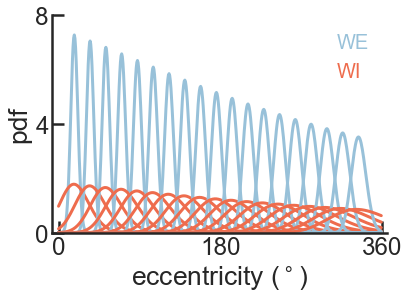

0.0439070827654815


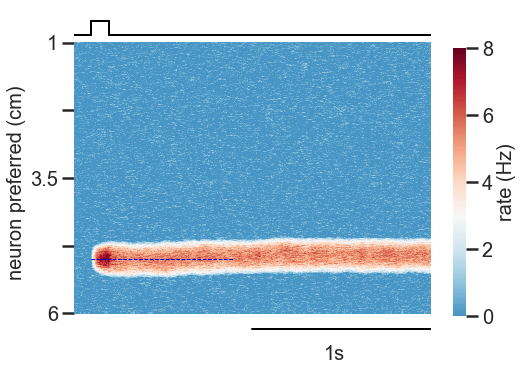

In [395]:
a = model_radial_linear(totalTime=2000, targ_onset=100,  presentation_period=100, positions=5, plot_connectivity=True, sigE=1., sigI=2.) 
print(a[0])
simulation_heatmap_rad(a[2], time_simulation=2000, position=5,  target_onset=100, pres_period=100)

0.01956673767153827


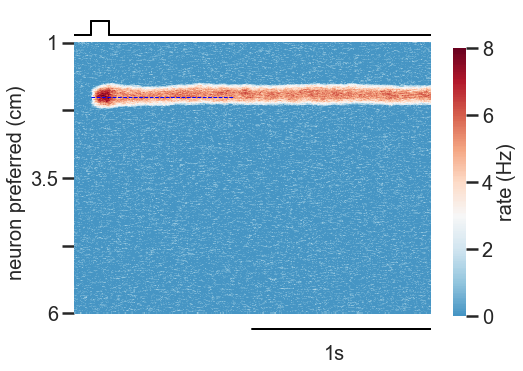

In [396]:
a = model_radial_linear(totalTime=2000, targ_onset=100,  presentation_period=100, positions=2, plot_connectivity=False, sigE=1., sigI=2.) 
print(a[0])
simulation_heatmap_rad(a[2], time_simulation=2000, position=2,  target_onset=100, pres_period=100)

In [ ]:

from linares_plot import *
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
import scipy.signal



def decode_rE(rE, a_ini=0, a_fin=360, N=512):
    #Population vector for a given rE
    # return ( angle in radians, absolut angle in radians, abs angle in degrees )
    N=len(rE)
    Angles = np.linspace(a_ini, a_fin, N) 
    angles=np.radians(Angles)
    rE = np.reshape(rE, (1,N))
    R = numpy.sum(np.dot(rE,exp(1j*angles)))/numpy.sum(rE) ## finding it with imagianry numbers
    angle_decoded = np.degrees(np.angle(R))
    if angle_decoded<0:
        angle_decoded = 360+angle_decoded
    
    return angle_decoded





In [397]:



def model_radial_linear2(totalTime, targ_onset, presentation_period, positions, 
                         N=512, rint = 1, rext = 6,
                         tauE=9, tauI=4,  
                         I0E=0.1, I0I=0.5, 
                         GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, 
                         NsigE=1., NsigI=2., 
                         plot_connectivity=False, plot_rate=False, save_RE=False):
    #
    st_sim =time.time()
    dt=2
    nsteps=int(floor(totalTime/dt));
    rE=zeros((N,1));
    rI=zeros((N,1));
    #Connectivities
    v_E=zeros((N));
    v_I=zeros((N));
    WE=zeros((N,N));
    WI=zeros((N,N));
    ###    
    ###     
    radii = np.linspace(rint, rext, N) ##all radii (linear)
    #### sigmasE (taking the kappaE in radius 1 in the angular model)
    ser1 = 1/300
    ke1=1.  
    ke2=1.7     ##above 1 to be supralinear (inconsistency: the change in kappaE is lesss stepper then in kappaI)         
    ke3=0.05             
    SE = ke1*ser1*radii**ke2 + ke3 ##all sigmasE (supralinear increase)
    #### sigmasI (taking the kappaI in radius 1 in the angular model) (alth¡hough I had to add the constant to correct)
    sir1 = 1/30 
    ki1=0.5
    ki2= 1.6  ##above 1 to be supralinear
    ki3=0.2
    SI = ki1*sir1*radii**ki2 + ki3 ##all sigmasI (supralinear increase)
    ###
    ### connectivity profile for E and I in the radial dimension
    for j in range(0, N): #para cada distancia hay una sigma diferente
        for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
            v_E[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((radii[i]- radii[j])**2)/(2*(SE[j]**2)))
            v_I[i]= 1/(sqrt(2*pi)*SI[j])*e**(-((radii[i]- radii[j])**2)/(2*(SI[j]**2)))
        ####
        WE[:,j]=v_E;
        WI[:,j]=v_I;
    ###
    # Plot of the connectivity profile
    if plot_connectivity ==True:
        plt.figure()
        p_cols=['#98c1d9', '#ee6c4d' ]
        for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
            plt.plot(WE[con_w, :], p_cols[0])
            plt.plot(WI[con_w, :], p_cols[1])
        plt.xlabel('eccentricity (cm)')
        plt.ylabel('pdf')
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.plot(WE[475, :], p_cols[0], label='WE')
        plt.plot(WI[475, :], p_cols[1], label='WI')
        plt.ylim(0,8)
        plt.yticks([0,4,8])
        plt.xlim(-10, 520)
        plt.xticks([0, int(512/2), 512], [str(rint), '', str(rext)])
        l = plt.legend(loc=1, frameon=False, prop={'size': 20})
        for i_h, h_idx in enumerate(['WE', 'WI']):
            l.get_texts()[i_h].set_text(h_idx)
            l.legendHandles[i_h].set_visible(False);
            l.get_texts()[i_h].set_color(p_cols[i_h]);
        #
        plt.show(block=False)
    ##
    ###
    # Stimulus profile
    stimulus = zeros((N));
    for j in range(0, N): #para cada distancia hay una sigma diferente
        for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
            stimulus[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((positions- radii[i])**2)/(2*(SE[j]**2))) 
    
    stimulus=reshape(stimulus, (N,1))
    ###
    ###
    stimon = floor(targ_onset/dt);
    stimoff = floor(targ_onset/dt) + floor(presentation_period/dt) ;
    #Simulation
    #generation of the noise and the connectivity between inhib and exit
    RE=zeros((N,nsteps));
    RI=zeros((N,nsteps));
    f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)
    ### diferential equations
    for i in range(0, nsteps):
        noiseE = NsigE*random.randn(N,1);
        noiseI = NsigI*random.randn(N,1);
        #differential equations for connectivity
        IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + I0E*ones((N,1));
        II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
        #
        if i>stimon and i<stimoff:
            IE=IE+stimulus;
            II=II+stimulus;
        #
        #rates of exit and inhib
        rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
        rI = rI + (f(II) - rI + noiseI)*dt/tauI;
        rEr=reshape(rE, N)
        rIr=reshape(rI, N)
        #drawnow
        RE[:,i] = rEr;
        RI[:,i] = rIr;
    #
    #
    if plot_rate==True:
        #### plot dynamics
        fig = plt.figure()
        plt.title('')
        plt.plot(rE)
        plt.xlabel('neuron')
        plt.ylabel('rate (Hz)')
        plt.show(block=False)

    ###
    ###
    final_readout = decode_rE(rE)
    final_readout = final_readout * ((rext-rint) / 360) + rint ##conversion a espacio (rint, rext)
    error =  positions - final_readout
    ### if error>0 means attraction to fixation
    ### if error<0 means repulsion to fixation
    if save_RE==True:
        return error, positions, RE
    else:
        return  error, positions
    #
##


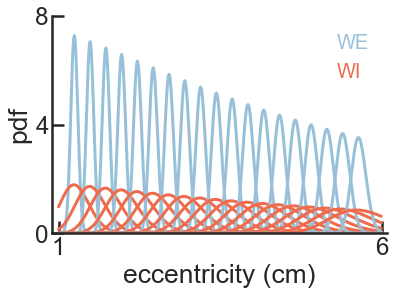

0.026690993734528767


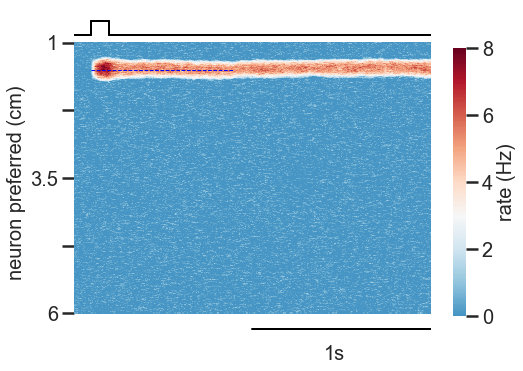

In [402]:
a = model_radial_linear2(totalTime=2000, targ_onset=100,  presentation_period=100, positions=1.5, plot_connectivity=True,
                        save_RE=True) 
print(a[0])
simulation_heatmap_rad(a[2], time_simulation=2000, position=1.5,  target_onset=100, pres_period=100)

In [ ]:
##### cuando el stepp de la I es más pronunciado, hay repulsion, elñ step de las I ha de ser menos pronunciado para que haya atraccion

In [321]:
decode_rE(rE)

213.024877486201

In [325]:
decode_rE(rE) * ((rext-rint) / 360) + rint

3.9586788539750137

In [326]:
positions

NameError: name 'positions' is not defined

In [334]:
### plotear el hetamap (se necesiat el RE)

def simulation_heatmap_rad(RE, time_simulation, position, target_onset, pres_period, rext=6, rint=1):
    pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    #
    dims=np.shape(RE)
    dimN = dims[0]
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(RE, cmap=pal_cyan, vmin=0, vmax=8,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0,2,4,6,8], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (position-rint) * dims[0]/(rext-rint)
    #
    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    #
    plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='blue', linewidth=1) 
    #
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels([str(rint),'',str((rext+rint)/2), '', str(rext)], fontsize=20)
    #
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred (cm)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)
    ###
    ##line stims 
    s1on=stimon
    s1off=stimoff
    plt.plot([0, s1on], [-15, -15], 'k-', linewidth=2)
    plt.plot([s1on, s1on], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1on, s1off], [-40, -40], 'k-', linewidth=2)
    plt.plot([s1off, s1off], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1off, dims[1]], [-15, -15], 'k-', linewidth=2)
    #
    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    plt.show()



In [182]:
SE = 1/kappas_e_range *17 
SI = 1/kappas_i_range *5
print(SE[0], SE[-1])
print(SI[0], SI[-1])

0.05666666666666667 0.17
0.25 0.4545454545454546


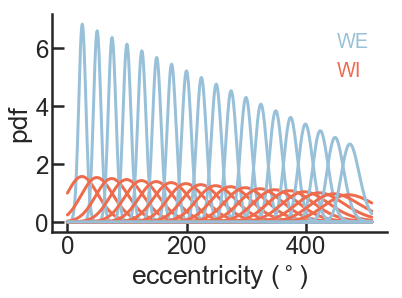

In [162]:
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

for j in range(0, N): #para cada distancia hay una sigma diferente
    for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((n_inicial[i]- n_inicial[j])**2)/(2*(SE[j]**2)))
        v_I[i]= 1/(sqrt(2*pi)*SI[j])*e**(-((n_inicial[i]- n_inicial[j])**2)/(2*(SI[j]**2)))
    ####
    WE[:,j]=v_E;
    WI[:,j]=v_I;
###
####
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.plot(WE[475, :], p_cols[0], label='WE')
#plt.ylim(0,8)
#plt.yticks([0,4,8])
#plt.xlim(-10, 520)
#plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)    

In [82]:
N=512 #number neurons
n_inc = 1 #radius in
n_ecx = 11 #radius out
n_inicial = np.linspace(n_inc, n_ecx, N)

In [83]:
alfa_E= 0.00075
alfa_I= 0.0015
alfa_E= 0.00080; 
alfa_I= 0.00009; 

sigmas_E= alfa_E* n_inicial**1.80 +0.035; 
sigmas_I=alfa_I* n_inicial**2.375 + 0.040; 


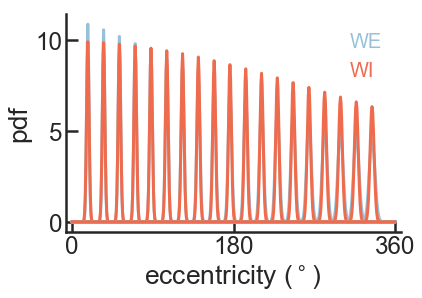

In [109]:
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

for j in range(0, N): #para cada distancia hay una sigma diferente
    for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E[i]= 1/(sqrt(2*pi)*sigmas_E[j])*e**(-((n_inicial[i]- n_inicial[j])**2)/(2*(sigmas_E[j]**2)))
        v_I[i]= 1/(sqrt(2*pi)*sigmas_I[j])*e**(-((n_inicial[i]- n_inicial[j])**2)/(2*(sigmas_I[j]**2)))
    ####
    WE[:,j]=v_E;
    WI[:,j]=v_I;

####
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.plot(WI[475, :], p_cols[1], label='WI')
#plt.ylim(0,8)
#plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)    

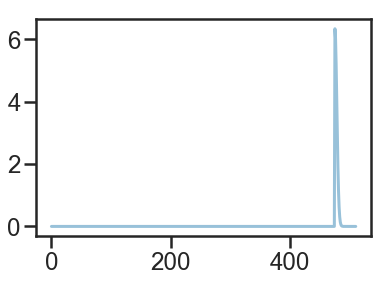

In [93]:
plt.plot(WE[475, :], p_cols[0], label='WE')


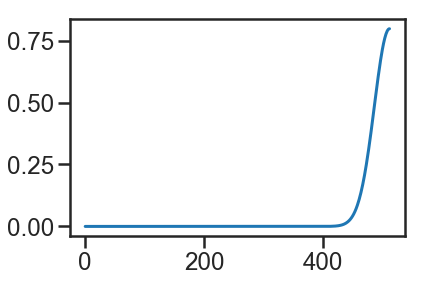

In [105]:
sigE = 0.5
f = [ 1/(sqrt(2*pi)*sigE)*e**(-((n_ecx-d)**2)/(2*(sigE**2)))  for d in n_inicial] 
plt.plot(f)

In [106]:
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

for j in range(0, N): #para cada distancia hay una sigma diferente
    for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E[i]= 1/(sqrt(2*pi)*sigmas_E[j])*e**(-((n_inicial[i]- n_inicial[j])**2)/(2*(sigmas_E[j]**2)))
        v_I[i]= 1/(sqrt(2*pi)*sigmas_I[j])*e**(-((n_inicial[i]- n_inicial[j])**2)/(2*(sigmas_I[j]**2)))
    ####
    WE[:,j]=v_E;
    WI[:,j]=v_I;

In [ ]:
v_E=zeros(1,N);
v_I=zeros(1,N);
WE=zeros(N,N);
WI=zeros(N,N);

for j=1:N %para cada distancia hay una sigma diferente
    for i=1:N %dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E(i)=1/(sqrt(2*pi)*sigmas_E(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_E(j))^2);
        v_I(i)=1/(sqrt(2*pi)*sigmas_I(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_I(j))^2);
    end
  WE(:,j)=v_E;
  WI(:,j)=v_I;
end

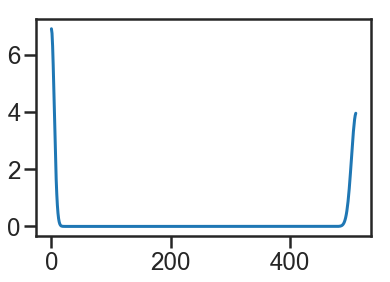

In [20]:
plt.plot(WE[0])

In [ ]:
alfa_E= 0.00080; %0.00055 %0.002 %0.0025;  %0.008
alfa_I= 0.00009; %0.02; %alfa_I ha de ser mayor a alfa E, ya que la inhibición ha de ser una gausiana mas ancha

sigmas_E= alfa_E* n_inicial.^1.80 +0.035; % antes +0,05 (graphs of the folder )% 1.9 es la menor sigma y 0.15 cercana a la mayor...
sigmas_I=alfa_I* n_inicial.^2.375 + 0.040; % 0.9 %^1.2


v_E=zeros(1,N);
v_I=zeros(1,N);
WE=zeros(N,N);
WI=zeros(N,N);

for j=1:N %para cada distancia hay una sigma diferente
    for i=1:N %dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E(i)=1/(sqrt(2*pi)*sigmas_E(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_E(j))^2);
        v_I(i)=1/(sqrt(2*pi)*sigmas_I(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_I(j))^2);
    end
  WE(:,j)=v_E;
  WI(:,j)=v_I;
end